# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [273]:
df = pd.read_csv('../data/am_pm.csv', index_col=0)
df

,date,am,pm,target,predict
0,2020-04-17,21,2,working_day,weekend
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day
5,2020-04-22,0,28,working_day,working_day
6,2020-04-23,10,33,working_day,working_day
7,2020-04-24,2,14,working_day,working_day
8,2020-04-25,30,74,weekend,working_day
9,2020-04-26,28,233,weekend,working_day


In [274]:
X = df[['am', 'pm']]
y = df['target']

model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(X, y)

y_pred = model.predict(X)

coef1 = model.coef_[0][0]
coef2 = model.coef_[0][1]
intercept = model.intercept_[0]

print(f'Intercept (b): {intercept}')
print(f'Coef (a): {coef1:.5f}, {coef2:.5f}')
print(f'y = {intercept:.5f} + {coef1:.5f} * x + {coef2:.5f} * x')

Intercept (b): 0.0
Coef (a): -0.00039, 0.00298
y = 0.00000 + -0.00039 * x + 0.00298 * x


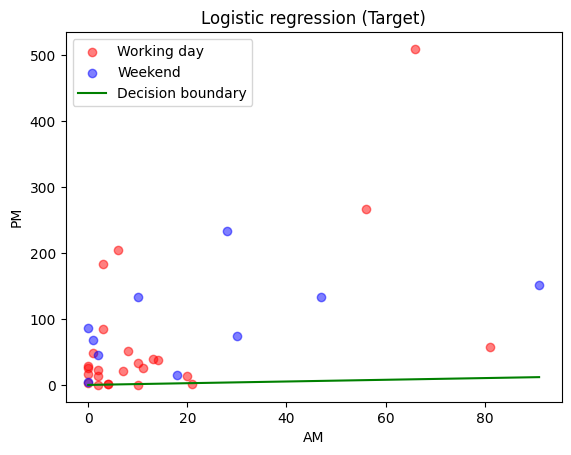

In [275]:
# Граница решения: это линия, разделяющая два класса, которая проходит там, где вероятность принадлежности к одному из классов равна 50%.

# Уравнение границы решения:
# w1 * x1 + w2 * x2 + b = 0

# w1 и w2 — коэффициенты модели,
# b — интерсепт.

# Решаем уравнение относительно x2:
# x2 = - (w1 / w2) * x1 - (b / w2)

# Координаты для границы:

# Наклон прямой (a), равный - (w1 / w2)
a = -model.coef_[0][0] / model.coef_[0][1]

# Пересечение с осью x2 (b), равное - (b / w2)
b = -model.intercept_[0] / model.coef_[0][1]

# Итоговое уравнение границы решения:
# x2 = a * x1 + b

xx = np.linspace(min(df['am']), max(df['am']), 2)
yy = a * xx + b

plt.title('Logistic regression (Target)')
plt.scatter(df[df['target'] == 'working_day']['am'],
            df[df['target'] == 'working_day']['pm'],
            c='red', alpha=0.5, label='Working day')

plt.scatter(df[df['target'] == 'weekend']['am'],
            df[df['target'] == 'weekend']['pm'],
            c='blue', alpha=0.5, label='Weekend')

plt.plot(xx, yy, color='green', label='Decision boundary')
plt.xlabel('AM')
plt.ylabel('PM')
plt.legend(loc='best')
plt.show()

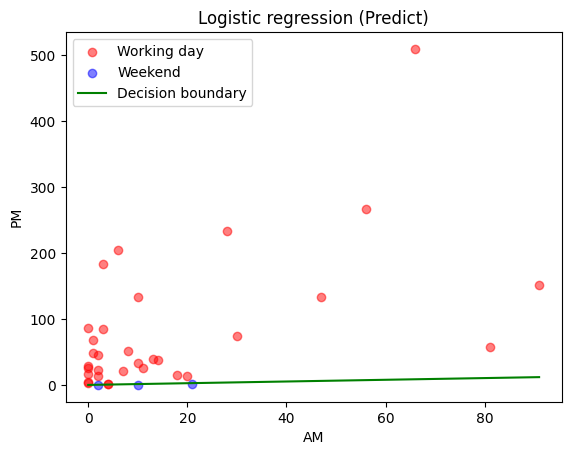

In [276]:
plt.title('Logistic regression (Predict)')
plt.scatter(df[df['predict'] == 'working_day']['am'],
            df[df['predict'] == 'working_day']['pm'],
            c='red', alpha=0.5, label='Working day')

plt.scatter(df[df['predict'] == 'weekend']['am'],
            df[df['predict'] == 'weekend']['pm'],
            c='blue', alpha=0.5, label='Weekend')
plt.plot(xx, yy, color='green', label='Decision boundary')
plt.xlabel('AM')
plt.ylabel('PM')
plt.legend(loc='best')
plt.show()

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [277]:
# Преобразование, масштабирует данные так, что они будут иметь среднее значение равное 0 и стандартное отклонение равное 1

scaler = StandardScaler()
df_scaler = df.copy()
df_scaler[['am', 'pm']] = scaler.fit_transform(X)
y = df_scaler['target']

X = scaler.fit_transform(X)

model.fit(X, y)
y2_pred = model.predict(X)

df_scaler

,date,am,pm,target,predict
0,2020-04-17,0.200690,-0.719904,working_day,weekend
1,2020-04-18,-0.655914,-0.071822,weekend,working_day
2,2020-04-19,0.072199,-0.592251,weekend,working_day
3,2020-04-20,-0.613084,-0.513696,working_day,working_day
4,2020-04-21,-0.698744,-0.494057,working_day,working_day
5,2020-04-22,-0.698744,-0.464599,working_day,working_day
6,2020-04-23,-0.270442,-0.415502,working_day,working_day
7,2020-04-24,-0.613084,-0.602071,working_day,working_day
8,2020-04-25,0.586162,-0.012906,weekend,working_day
9,2020-04-26,0.500501,1.548382,weekend,working_day


In [278]:
accuracy_model = accuracy_score(df['target'], df['predict'])
print(f'Accuracy of the model: {accuracy_model * 100:.2f}%')

most_popular_class = df['target'].mode()[0]
native_predictions = [most_popular_class] * len(df)
accuracy_native = accuracy_score(df['target'], native_predictions)
print(f'Accuracy of the native model: {accuracy_native * 100:.2f}%')

accuracy_scaler = accuracy_score(df['target'], y2_pred)
print(f'Accuracy of the scaler model: {accuracy_scaler * 100:.2f}%')

Accuracy of the model: 62.86%
Accuracy of the native model: 71.43%
Accuracy of the scaler model: 74.29%


In [279]:
a = -model.coef_[0][0] / model.coef_[0][1]
b = -model.intercept_[0] / model.coef_[0][1]
xx = np.linspace(min(df_scaler['am']), max(df_scaler['am']), 100)
yy = a * xx + b

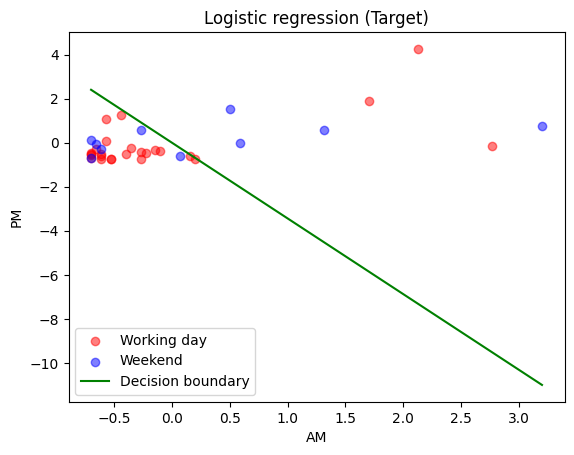

In [280]:
plt.title('Logistic regression (Target)')
plt.scatter(df_scaler[df_scaler['target'] == 'working_day']['am'],
            df_scaler[df_scaler['target'] == 'working_day']['pm'],
            c='red', alpha=0.5, label='Working day')

plt.scatter(df_scaler[df_scaler['target'] == 'weekend']['am'],
            df_scaler[df_scaler['target'] == 'weekend']['pm'],
            c='blue', alpha=0.5, label='Weekend')
plt.plot(xx, yy, color='green', label='Decision boundary')
plt.xlabel('AM')
plt.ylabel('PM')
plt.legend(loc='best')
plt.show()

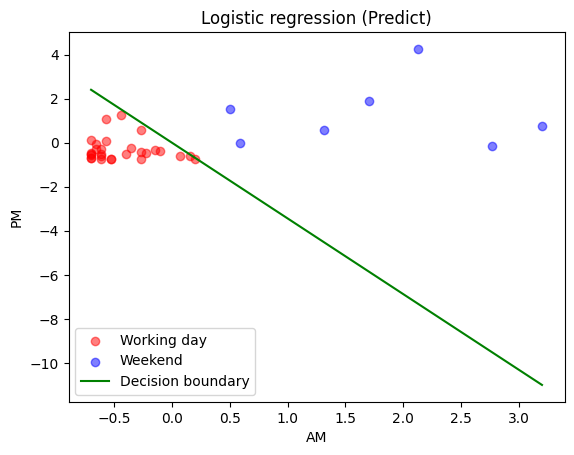

In [281]:
df_scaler['predict'] = y2_pred 

plt.title('Logistic regression (Predict)')
plt.scatter(df_scaler[df_scaler['predict'] == 'working_day']['am'],
            df_scaler[df_scaler['predict'] == 'working_day']['pm'],
            c='red', alpha=0.5, label='Working day')

plt.scatter(df_scaler[df_scaler['predict'] == 'weekend']['am'],
            df_scaler[df_scaler['predict'] == 'weekend']['pm'],
            c='blue', alpha=0.5, label='Weekend')
plt.plot(xx, yy, color='green', label='Decision boundary')
plt.xlabel('AM')
plt.ylabel('PM')
plt.legend(loc='best')
plt.show()

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [282]:
# SVC — это метод машинного обучения для классификации данных. Он находит гиперплоскость, которая максимально разделяет два класса. Можно представить, что это линия, которая делит данные на две части, так, чтобы они как можно лучше разделялись.

df_svc = df.copy()
df_svc = df_svc.drop(columns='predict')

df_svc[['am', 'pm']] = scaler.fit_transform(df[['am', 'pm']])

df_svc['target'] = df_svc['target'].map({'working_day': 0, 'weekend': 1})

X = df_svc[['am', 'pm']].values 
y = df_svc['target'].values

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_score = 0
best_kernel = ''

for kernel in kernels:
    model = SVC(kernel=kernel, probability=True, random_state=21)
    model.fit(X, y)
    y3_pred = model.predict(X)
    df_svc[kernel] = y3_pred
    score = accuracy_score(y, y3_pred)
    if score > best_score:
        best_score = score
        best_kernel = kernel
    print(f'Kernel {kernel}: score = {score}')

print(f'Best kernel is {best_kernel}: score = {best_score}')

Kernel linear: score = 0.7142857142857143
Kernel poly: score = 0.7428571428571429
Kernel rbf: score = 0.7428571428571429
Kernel sigmoid: score = 0.6857142857142857
Best kernel is poly: score = 0.7428571428571429


In [283]:
df_svc.head(10)

,date,am,pm,target,linear,poly,rbf,sigmoid
0,2020-04-17,0.200690,-0.719904,0,0,0,0,0
1,2020-04-18,-0.655914,-0.071822,1,0,0,0,0
2,2020-04-19,0.072199,-0.592251,1,0,0,0,0
3,2020-04-20,-0.613084,-0.513696,0,0,0,0,0
4,2020-04-21,-0.698744,-0.494057,0,0,0,0,0
5,2020-04-22,-0.698744,-0.464599,0,0,0,0,0
6,2020-04-23,-0.270442,-0.415502,0,0,0,0,0
7,2020-04-24,-0.613084,-0.602071,0,0,0,0,0
8,2020-04-25,0.586162,-0.012906,1,0,0,0,0
9,2020-04-26,0.500501,1.548382,1,0,0,0,1


In [284]:
h = .02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

model = SVC(kernel='poly', probability=True, random_state=21)
model.fit(X, y)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

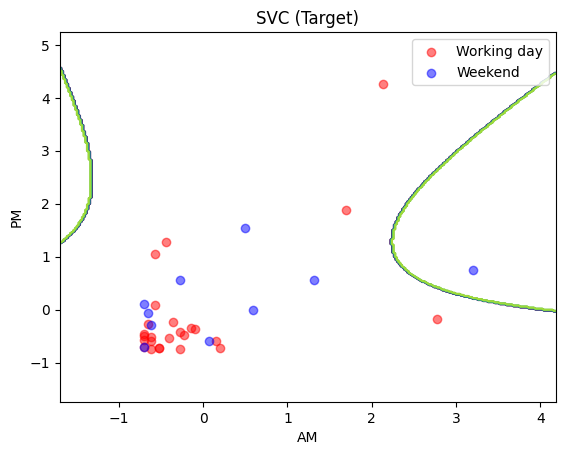

In [285]:
plt.title('SVC (Target)')
plt.scatter(df_svc[df_svc['target'] == 0]['am'],
            df_svc[df_svc['target'] == 0]['pm'],
            c='red', alpha=0.5, label='Working day')

plt.scatter(df_svc[df_svc['target'] == 1]['am'],
            df_svc[df_svc['target'] == 1]['pm'],
            c='blue', alpha=0.5, label='Weekend')
plt.contour(xx, yy, Z)
plt.xlabel('AM')
plt.ylabel('PM')
plt.legend(loc='best')
plt.show()

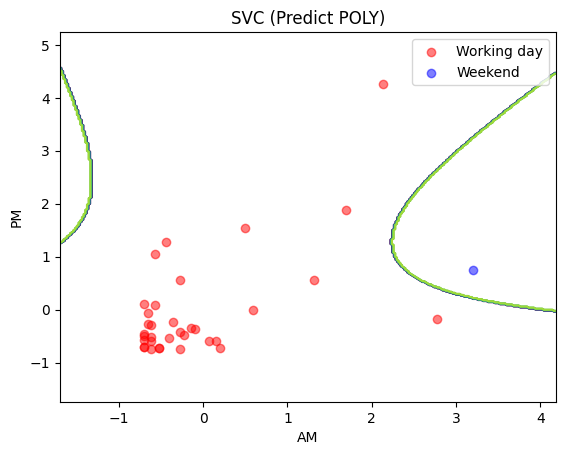

In [286]:
plt.title('SVC (Predict POLY)')
plt.scatter(df_svc[df_svc['poly'] == 0]['am'],
            df_svc[df_svc['poly'] == 0]['pm'],
            c='red', alpha=0.5, label='Working day')

plt.scatter(df_svc[df_svc['poly'] == 1]['am'],
            df_svc[df_svc['poly'] == 1]['pm'],
            c='blue', alpha=0.5, label='Weekend')
plt.contour(xx, yy, Z)
plt.xlabel('AM')
plt.ylabel('PM')
plt.legend(loc='best')
plt.show()

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [287]:
# DecisionTreeClassifier — это алгоритм машинного обучения для решения задач классификации, который использует древовидную структуру для разделения данных на классы. 

df_tree = df.copy()

df_tree[['am', 'pm']] = scaler.fit_transform(df_tree[['am', 'pm']])

df_tree['target'] = df_tree['target'].map({'working_day': 0, 'weekend': 1})

X = df_tree[['am', 'pm']].values
y = df_tree['target']

In [288]:
for depth in range(1, 8):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X, y)

    y4_pred = model.predict(X)
    score = accuracy_score(y, y4_pred)
    print(f'Score = {score:.4f} for depth {depth}')

Score = 0.7714 for depth 1
Score = 0.8571 for depth 2
Score = 0.8857 for depth 3
Score = 0.9429 for depth 4
Score = 0.9714 for depth 5
Score = 1.0000 for depth 6
Score = 1.0000 for depth 7


In [289]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X, y)

y4_pred = model.predict(X)
df_tree['predict'] = y4_pred

accuracy_score(y, y4_pred)

0.9428571428571428

In [290]:
h = .02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

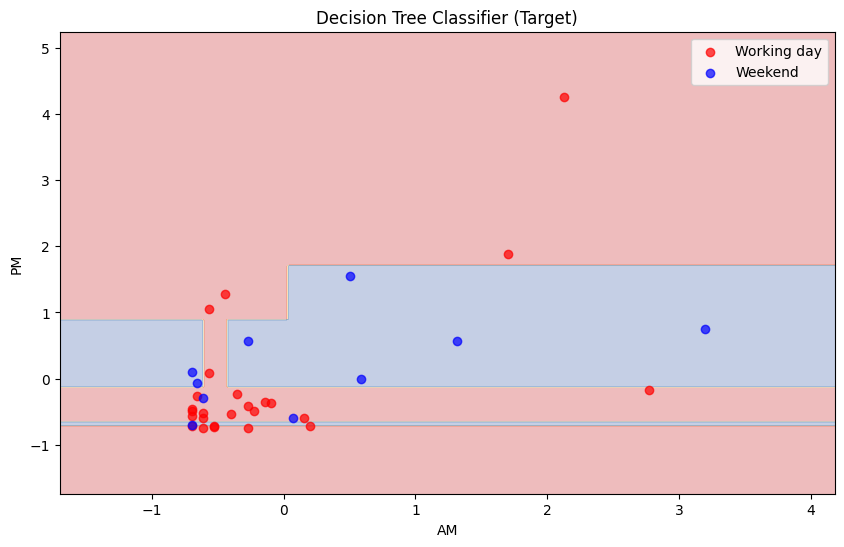

In [291]:
plt.figure(figsize=(10, 6))

plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')

plt.scatter(df_tree[df_tree['target'] == 0]['am'],
            df_tree[df_tree['target'] == 0]['pm'],
            c='red', label='Working day', alpha=0.7)

plt.scatter(df_tree[df_tree['target'] == 1]['am'],
            df_tree[df_tree['target'] == 1]['pm'],
            c='blue', label='Weekend', alpha=0.7)

plt.title('Decision Tree Classifier (Target)')
plt.xlabel('AM')
plt.ylabel('PM')
plt.legend(loc='best')
plt.show()

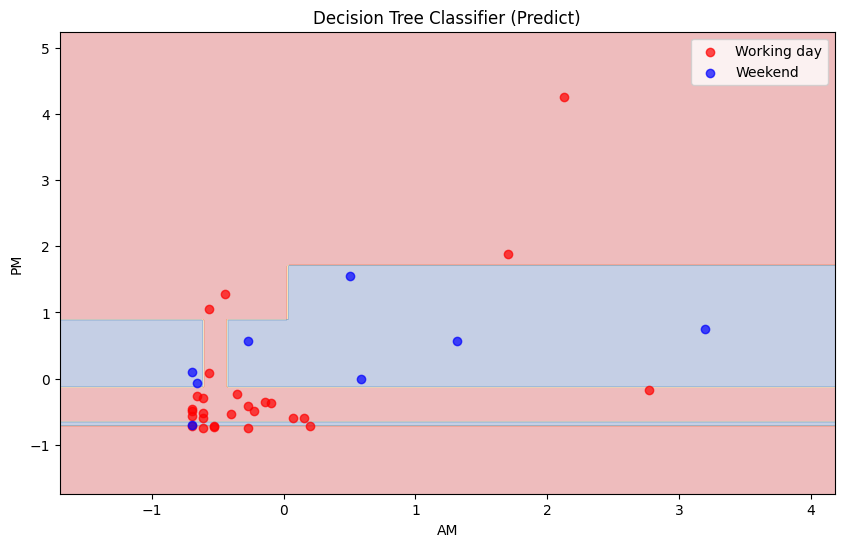

In [292]:
plt.figure(figsize=(10, 6))

plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')

plt.scatter(df_tree[df_tree['predict'] == 0]['am'],
            df_tree[df_tree['predict'] == 0]['pm'],
            c='red', label='Working day', alpha=0.7)

plt.scatter(df_tree[df_tree['predict'] == 1]['am'],
            df_tree[df_tree['predict'] == 1]['pm'],
            c='blue', label='Weekend', alpha=0.7)

plt.title('Decision Tree Classifier (Predict)')
plt.xlabel('AM')
plt.ylabel('PM')
plt.legend(loc='best')
plt.show()

In [293]:
df_tree

,date,am,pm,target,predict
0,2020-04-17,0.200690,-0.719904,0,0
1,2020-04-18,-0.655914,-0.071822,1,1
2,2020-04-19,0.072199,-0.592251,1,0
3,2020-04-20,-0.613084,-0.513696,0,0
4,2020-04-21,-0.698744,-0.494057,0,0
5,2020-04-22,-0.698744,-0.464599,0,0
6,2020-04-23,-0.270442,-0.415502,0,0
7,2020-04-24,-0.613084,-0.602071,0,0
8,2020-04-25,0.586162,-0.012906,1,1
9,2020-04-26,0.500501,1.548382,1,1


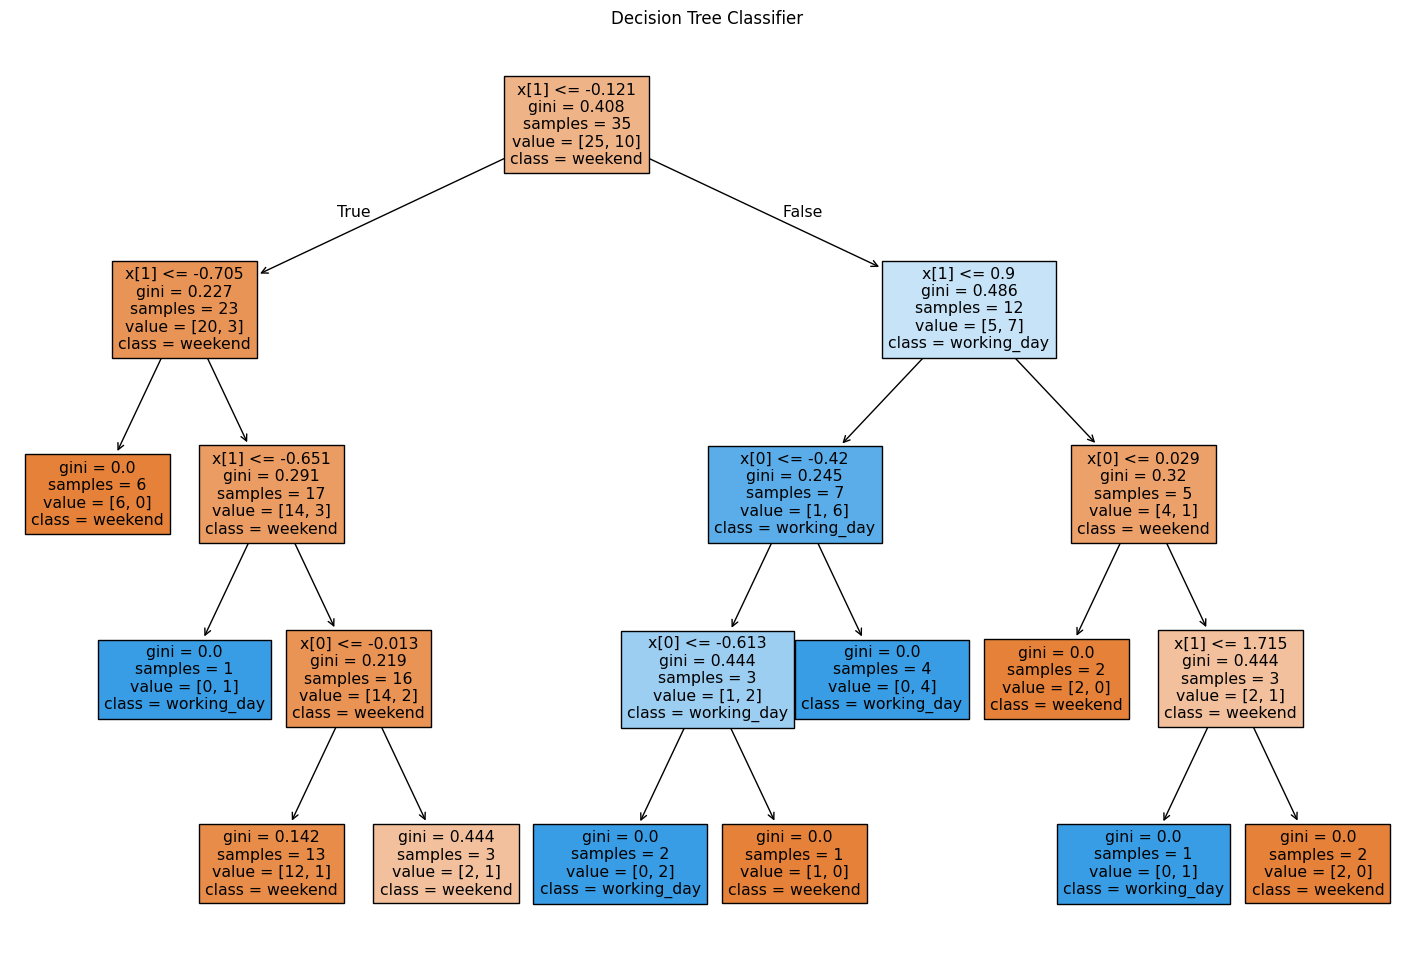

In [294]:
plt.figure(figsize=(18, 12))
plot_tree(model, filled=True, class_names=['weekend', 'working_day'])
plt.title('Decision Tree Classifier')
plt.show()

#### How many leaves in the visualized tree label days as working days?
#### Answer: 4